In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

In [1]:
import pickle
import pandas as pd

df_access = pickle.load(open("pd_access.3.p", "rb"))

In [ ]:
def add_date_column(df):
    df['date'] = df['year'].map(str)+'-'+df['month'].map(str)+'-'+df['day'].map(str)
    return dfa

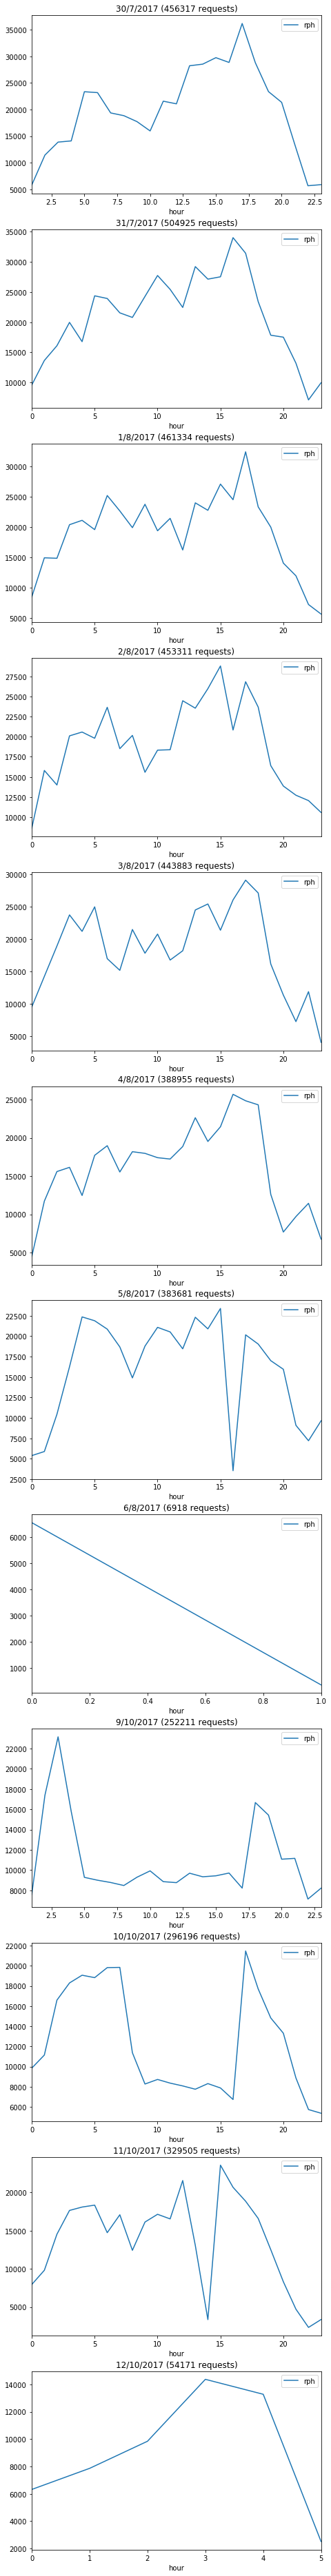

In [62]:
df_rpd = df_access.groupby(["year", "month", "day"]).day.count().to_frame().rename(columns={'day':'rpd'}).reset_index()
reduce_size_by = 1.33
fig = plt.figure(figsize=(10/reduce_size_by,(15*12)/(2*reduce_size_by)))
for index, row in df_rpd.iterrows():
    df_rph = df_access[(df_access.day==row.day) & (df_access.month==row.month) & (df_access.year==row.year)].groupby(["hour"]).hour.count().to_frame().rename(columns={'hour':'rph'}).reset_index()
    ax = fig.add_subplot(12, 1,index+1)
    plot = df_rph.plot(
        x="hour",
        y="rph",
        title="{}/{}/{} ({} requests)".format(row.day, row.month, row.year, df_rph.rph.sum()),
        ax=ax
    )

In [40]:
df_error = pd.DataFrame(pickle.load(open("df_error.p", "rb")))

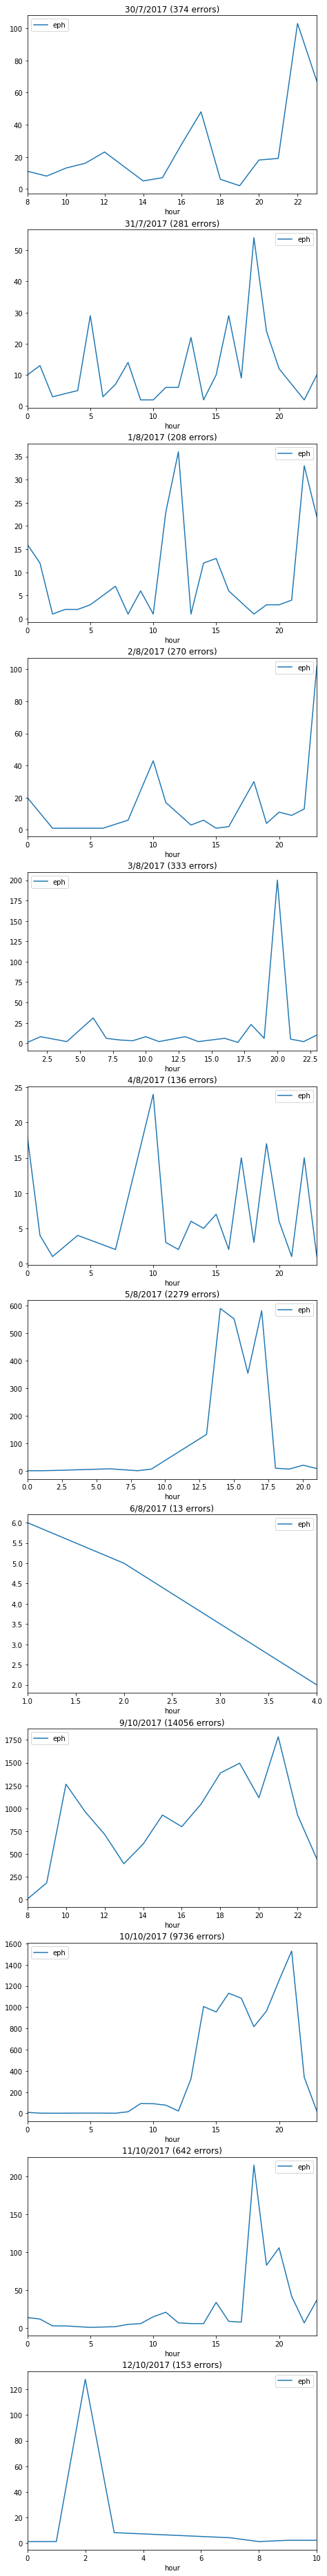

In [61]:
df_epd = df_error.groupby(["year", "month", "day"]).day.count().to_frame().rename(columns={'day':'epd'}).reset_index()
reduce_size_by = 1.33
fig = plt.figure(figsize=(10/reduce_size_by,(15*12)/(2*reduce_size_by)))
for index, row in df_epd.iterrows():
    df_eph = df_error[(df_error.day==row.day) & (df_error.month==row.month) & (df_error.year==row.year)].groupby(["hour"]).hour.count().to_frame().rename(columns={'hour':'eph'}).reset_index()
    ax = fig.add_subplot(12,1,index+1)
    plot = df_eph.plot(
        x="hour",
        y="eph",
        title="{}/{}/{} ({} errors)".format(row.day, row.month, row.year, df_eph.eph.sum()),
        ax=ax
    )